**Required Modules**


*   NumPy: Handles Arrays And Numerical Computations.

*   Scipy: Adds Advanced Scientific And Mathematical Functions.

*   Matplotlib: Creates Plots And Visualizations.

*   ImageIO: Reads And Writes Image Files.

*   Scikit-Image: Provides Tools For Image Processing And Analysis.







In [1]:
import imageio.v3 as iio, matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from scipy import misc
from scipy.datasets import ascent
from scipy.ndimage import gaussian_filter,sobel,rotate
from skimage.color import rgb2gray,rgba2rgb


/tmp/ipython-input-1018616449.py:4: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


In [2]:
#For The Image :
from google.colab import files
uploaded = files.upload()

Saving racoon.png to racoon.png


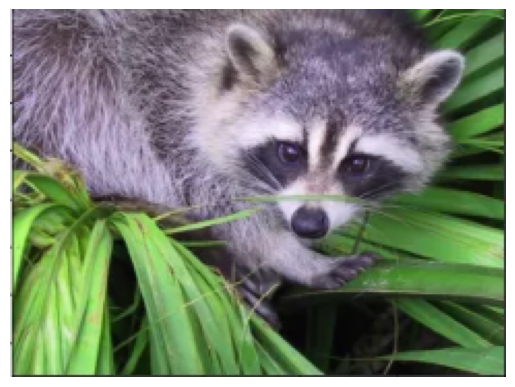

In [3]:
#Opening And Displaying Image
img=iio.imread("racoon.png")
#Displaying Image
plt.imshow(img)
plt.axis('off') #Hides Axes For A Cleaner Look
plt.show()

In [4]:
#Creating Numpy Array From Image
img=iio.imread("racoon.png")
print("Shape:",img.shape)
print("Data Type:",img.dtype)

Shape: (178, 240, 4)
Data Type: uint8


In [5]:
#Creating RAW File
'''
A .raw File Stores Binary Data From An Image Sensor Or Matrix.
'''
img=iio.imread("racoon.png")
img.tofile("raccoon.raw") #Saves The Image Pixel Data As A Binary File

In [6]:
#Opening RAW File
org=iio.imread("racoon.png")
h,w,c=org.shape
flat=np.fromfile('raccoon.raw',dtype=np.uint8)
img=flat.reshape((h,w,c))
print(img.shape)

(178, 240, 4)


In [7]:
#Getting Statistical Information Of The Image
img=iio.imread("racoon.png")
print(f"Max:{img.max()},\nMin:{img.min()},\nMean:{img.mean()}")
#These Functions Indicate Contrast And Brightness Of The Image

Max:255,
Min:0,
Mean:145.67792602996255


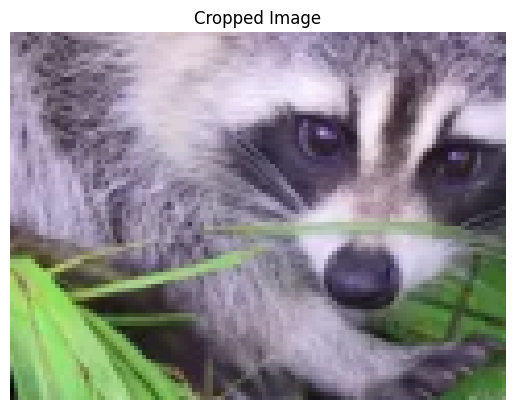

In [8]:
#Cropping The Image
img=iio.imread("racoon.png")
x,y,a=img.shape
#Cropping Center Region
crop=img[h//4:3*h//4,w//4:3*w//4]
#Displaying Cropped Image
plt.imshow(crop)
plt.axis('off')
plt.title("Cropped Image")
plt.show()

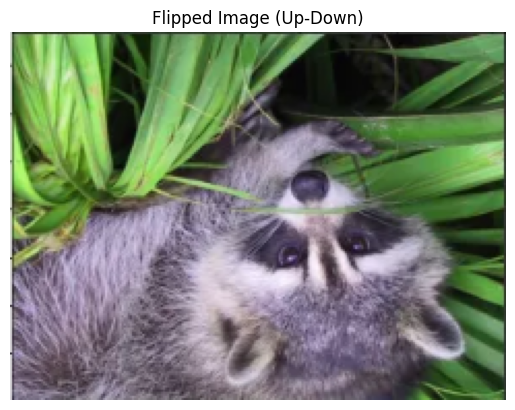

In [9]:
#Flipping The Image
img=iio.imread('racoon.png')
flip=np.flipud(img)
#Displaying The Image
plt.imshow(flip)
plt.axis('off')
plt.title("Flipped Image (Up-Down)")
plt.show()

**Filtering Images**

Used To Enhance Or Surpress Certain Features.

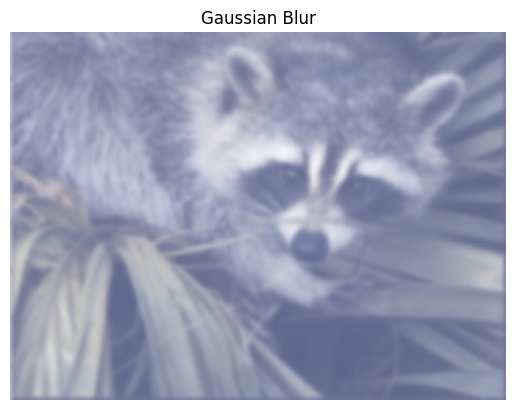

In [10]:
#Gaussian Blur
'''
Reduce Image Noise And Details Using A Gaussian Kernel.
'''
img=iio.imread('racoon.png')
blur=gaussian_filter(img,sigma=1)
'''
sigma Controls The Intensity Of Blur And Converts To uint8 Before
Displaying To Ensure Proper Color Rendering
'''
#Displaying The Image
plt.imshow(blur.astype(np.uint8))
plt.axis('off')
plt.title("Gaussian Blur")
plt.show()

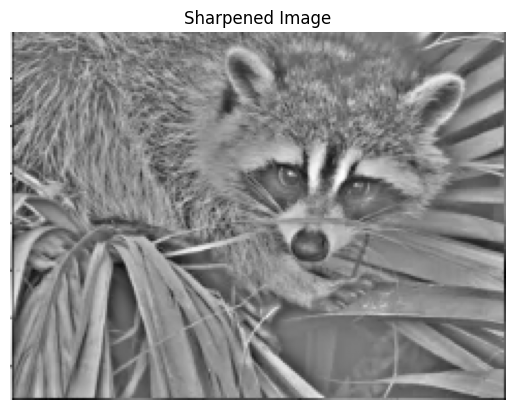

In [11]:
#Sharpening Image (Unsharp Masking)
'''
Increases Contrast Between Edges To Enhance Details And Clarity.
Unsharp Masking Subtracts A Blurred Version From The Original.
'''
img=iio.imread('racoon.png')
if img.shape[-1]==4:
  img=rgba2rgb(img)
#Converting To Grayscale
gray=rgb2gray(img).astype(float)
blur=gaussian_filter(gray,5)
aplha=30
#Extracting Edge Details And Adding Edge Details Back Using Alpha Scaling
sharp=gray+aplha*(gray-gaussian_filter(blur,1))
#Displaying The Image
plt.imshow(sharp,cmap='gray')
plt.axis('off')
plt.title("Sharpened Image")
plt.show()


**Denoising Images**

Removes Random Noise To Enhance Image Quality, Particularly Useful In Low-Light Photography.

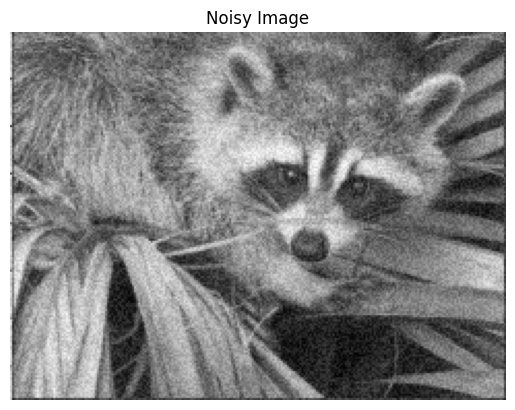

In [12]:
#Adding Noise
img=iio.imread('racoon.png')
if img.shape[-1]==4:
  img=rgba2rgb(img)
gray=rgb2gray(img).astype(float)
#Adding Random Values Scaled By Image Standard Deviation To Simulate Noise
noisy_img=gray+0.9*gray.std()*np.random.random(gray.shape)
#Displaying Image
plt.imshow(noisy_img,cmap='gray')
plt.axis('off')
plt.title("Noisy Image")
plt.show()

**Edge Detection Using Sobel Filter**

Sobel Edge Detection Identifies Image Edges By Computing Intensity
Gradients Using 3x3 Kernels.

Highlights Boundaries By Combining Horizontal And Vertical Changes, Aiding In Tasks Like Segmentation And Object Detection.

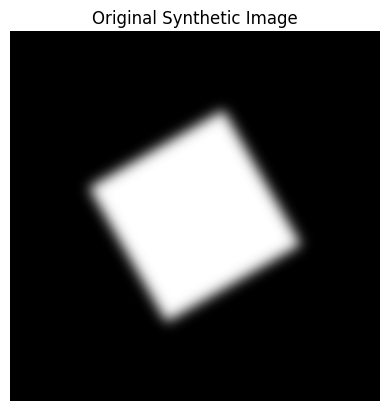

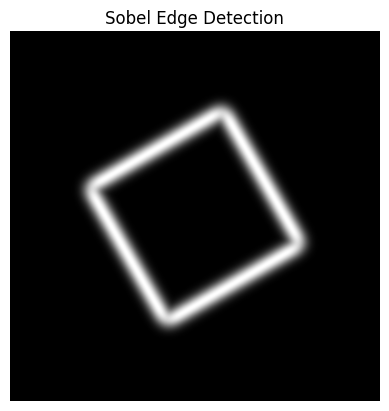

In [13]:
#Creating A Synthetic Image
i=np.zeros((300,300))
i[64:-64,64:-64]=1
i=rotate(i,30,mode='constant')
#Applying Gaussian Blur
i=gaussian_filter(i,sigma=7)
#Displaying Original Image
plt.imshow(i,cmap='gray')
plt.axis('off')
plt.title("Original Synthetic Image")
plt.show()
#Sobel Edge Detetction
dx=sobel(i,axis=0,mode='constant') #Horizontal Gradient
dy=sobel(i,axis=1,mode='constant') #Vertical Gradient
sob=np.hypot(dx,dy)
#Displaying Sobel Detected Image
plt.imshow(sob,cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Detection")
plt.show()

**Multidimensional Image Processing**

/tmp/ipython-input-4269383344.py:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  gauss=scipy.ndimage.filters.gaussian_filter(img,sigma=3)
/tmp/ipython-input-4269383344.py:7: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  median=scipy.ndimage.filters.median_filter(img,size=3)
/tmp/ipython-input-4269383344.py:9: DeprecationWarning: Please import `sobel` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  sob=scipy.ndimage.filters.sobel(img)
/tmp/ipython-input-4269383344.py:11: DeprecationWarning: Please import `laplace` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  laplace=scipy.

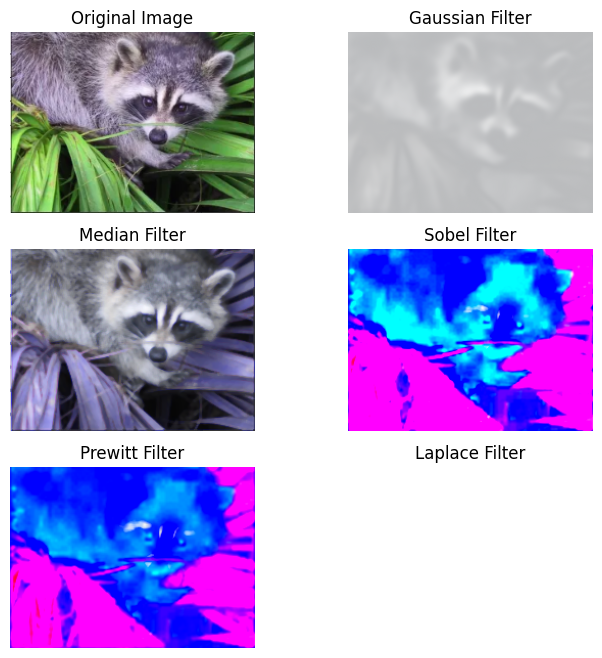

In [14]:
#Using Different Filters
#Reading The Image
img=plt.imread('racoon.png')
#Applying Gaussian Filter
gauss=scipy.ndimage.filters.gaussian_filter(img,sigma=3)
#Applying Median Filter
median=scipy.ndimage.filters.median_filter(img,size=3)
#Applying Sobel Filter
sob=scipy.ndimage.filters.sobel(img)
#Applying Laplace Filter
laplace=scipy.ndimage.filters.laplace(img)
#Applying Prewitt Filter
prewit=scipy.ndimage.filters.prewitt(img)
#Initializing The Subplot Using Number Of Rows And Columns
fig,axis=plt.subplots(3,2,figsize=(8,8))
#Original Image
axis[0,0].imshow(img)
axis[0,0].set_title("Original Image")
axis[0,0].axis('off')
#Gaussian Filter
axis[0,1].imshow(gauss)
axis[0,1].set_title("Gaussian Filter")
axis[0,1].axis('off')
#Median Filter
axis[1,0].imshow(median)
axis[1,0].set_title("Median Filter")
axis[1,0].axis('off')
#Sobel Filter
axis[1,1].imshow(sob)
axis[1,1].set_title("Sobel Filter")
axis[1,1].axis('off')
#Laplace Filter
axis[2,1].imshow(laplace)
axis[2,1].set_title("Laplace Filter")
axis[2,1].axis('off')
#Prewitt Filter
axis[2,0].imshow(prewit)
axis[2,0].set_title("Prewitt Filter")
axis[2,0].axis('off')
#Displaying
plt.show()

/tmp/ipython-input-1869444946.py:17: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  resize=scipy.ndimage.interpolation.zoom(img,zoom=2,order=1)
/tmp/ipython-input-1869444946.py:19: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  shift=scipy.ndimage.interpolation.shift(img,shift=(10,20))
/tmp/ipython-input-1869444946.py:21: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  rotatedimg=scipy.ndimage.interpolation.rotate(img,angle=45)
/tmp/ipython-input-1869444946.py:23: DeprecationWarning: Please import `spline_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and wil

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

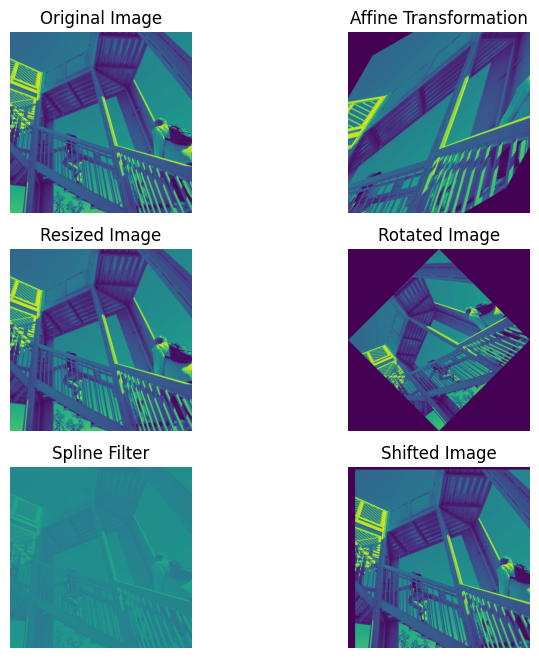

In [15]:
#Different Image Interpolation Methods
#Reading The Image
img=ascent()
#Applying Affline Transformation
w,h=img.shape
#Rotating The Image By 30° Counter Clockwise
theta=np.pi/6
#Centering The Image And Applying Rotation Then Inverse Shift
rotimg=np.array(
    [[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array(
    [[np.cos(theta),np.sin(theta),0],
     [np.sin(theta), np.cos(theta),0],[0,0,1]]) @ np.array(
    [[1,0,-w/2],[0,1,-h/2],[0,0,1]])
#Affine Transformation
affine=scipy.ndimage.affine_transform(img,rotimg)
#Resizing The Image Using Bilinear Interpolation With Zoom
resize=scipy.ndimage.interpolation.zoom(img,zoom=2,order=1)
#Shifting The Image By (10,20) Pixels
shift=scipy.ndimage.interpolation.shift(img,shift=(10,20))
#Rotating The Image By 45 Degrees
rotatedimg=scipy.ndimage.interpolation.rotate(img,angle=45)
#Applying Spline Filter
fltrimg=scipy.ndimage.interpolation.spline_filter(img)
#Initializing The Subplot Using Rows And Columns
fig,axis=plt.subplots(3,2,figsize=(8,8))
#Original Image
axis[0,0].imshow(img)
axis[0,0].set_title("Original Image")
axis[0,0].axis('off')
#Affline Transformation
axis[0,1].imshow(affine)
axis[0,1].set_title('Affine Transformation')
axis[0,1].axis('off')
#Zoom Filter
axis[1,0].imshow(resize)
axis[1,0].set_title("Resized Image")
axis[1,0].axis('off')
#Rotate Filter
axis[1,1].imshow(rotatedimg)
axis[1,1].set_title("Rotated Image")
axis[1,1].axis('off')
#Shift Filter
axis[2,1].imshow(shift)
axis[2,1].set_title("Shifted Image")
axis[2,1].axis('off')
#Spline Filter
axis[2,0].imshow(fltrimg)
axis[2,0].set_title("Spline Filter")
axis[2,0].axis('off')

**Statistical Information**

In [16]:
#Reading The Image
img=plt.imread('racoon.png')
#Converting To Grayscale
img=np.mean(img,axis=2)
#Setting Up Threshold To Create A Binary Image
thres=128
binary_img=img>thres
#Extremum
min,max,minloc,maxloc=scipy.ndimage.extrema(img)
#Mean Value
mean=scipy.ndimage.mean(img)
#Calculating Centre Of Mass
com=scipy.ndimage.center_of_mass(img)
#Standard Deviation
std_deviat=scipy.ndimage.standard_deviation(img)
#Variance
var=scipy.ndimage.variance(img)
#Displaying

print("Minimum pixel value in the image is {} on the location {}".format(min, minloc))
print("Maximum pixel value in the image is {} on the location {}".format(max,maxloc))
print("Mean:- {} \nCenter of Mass:- {} \nStandard Deviation:- {} \nVariance:- {}".format(
    mean,
    com,
    std_deviat,
    var))

Minimum pixel value in the image is 0.2549019753932953 on the location (np.int64(172), np.int64(188))
Maximum pixel value in the image is 0.9852941036224365 on the location (np.int64(58), np.int64(132))
Mean:- 0.571285999312383 
Center of Mass:- (np.float64(84.90371820044608), np.float64(113.7708544738829)) 
Standard Deviation:- 0.15308719673671534 
Variance:- 0.023435689804705787
